In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [81]:
median_df = pd.read_csv('/content/drive/MyDrive/ML Semester Project/TimeSeries_median_masked.csv')
max_df = pd.read_csv('/content/drive/MyDrive/ML Semester Project/TimeSeries_maximum.csv')
min_df = pd.read_csv('/content/drive/MyDrive/ML Semester Project/TimeSeries_minimum.csv')-
average_df = pd.read_csv('/content/drive/MyDrive/ML Semester Project/TimeSeries_average_masked.csv')
population = pd.read_csv('/content/drive/MyDrive/MLproject/GDP_Population_Energy/population_updated.csv')

In [82]:
median_df.head()

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Uganda,18567.234269,18757.903367,20024.038434,19082.041700,26129.910484,26940.158057,31644.310435,34425.150394,41372.993142,50459.599190,62678.119519,77217.893887
1,Eritrea,2387.048038,2166.414558,2058.772888,2008.606258,2832.027779,2949.558310,2540.962049,2604.918399,2232.589415,2129.226635,2346.268608,2333.387918
2,Ethiopia,43817.541456,47949.138117,52999.794212,50930.361191,66205.212636,60662.970175,58846.744368,66003.987742,69814.422502,75279.913999,89531.023385,107444.008906
3,Comoros,302.185035,230.496317,169.520843,175.700849,436.962549,524.849745,428.308761,453.856041,513.244298,586.547742,602.029931,599.391372
4,Djibouti,2988.842974,3169.500234,3558.319800,4097.033018,5032.377911,5421.726712,5612.377902,5610.321348,6137.854732,6280.627179,6994.634953,7412.790302


In [83]:
min_df.head()

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Uganda,-75169.248639,-127951.344198,-40466.045496,-86022.095063,82554.508537,109531.741701,43439.410540,72699.197019,159108.098524,105739.727423,199177.344615,209226.143447
1,Eritrea,-51054.215196,-113377.652708,-24588.431002,-78349.886465,12411.613786,28581.805490,13823.966724,2299.501737,54688.270368,67385.398505,76895.873201,77260.403986
2,Ethiopia,-535710.656926,-890794.136822,-216494.737333,-712082.512855,193699.190009,358371.828076,62740.114211,72666.891918,532934.299806,683854.655633,677276.361624,685950.157951
3,Comoros,-682.602949,-793.295901,-974.899547,-901.050660,435.603631,737.321607,232.306706,1048.098458,1272.597233,1003.051744,1624.099110,1575.556854
4,Djibouti,-8683.996654,-14902.712741,-1836.914447,-12509.663612,5112.846467,9823.716705,5092.257521,5368.337947,13483.109732,17939.636305,16987.713279,17718.944331


In [29]:
population.head()

,Country Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,31622704.0,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
1,Angola,26165620.0,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0
2,Albania,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0,2745972.0
3,Andorra,75194.0,73737.0,72174.0,72181.0,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0
4,United Arab Emirates,7693031.0,8059440.0,8505237.0,8935095.0,9223225.0,9346701.0,9445785.0,9401038.0,9575152.0,10074977.0,10483751.0



Analysing Correlation of all band valued with Population over the years
---



In [88]:

maximum_melted = max_df.melt(id_vars="Country", var_name="Year", value_name="Maximum")
population_metlted = population.melt(id_vars="Country", var_name="Year", value_name="Population")

# Merge the long-format data on Country and Year
combined_long_population = pd.merge(maximum_melted, population_metlted, on=["Country", "Year"])

# Pivot back to wide format with interleaved columns
combined_wide_population= combined_long_population.pivot(index="Country", columns="Year")

# Flatten multi-index columns
combined_wide_population.columns = [f"{var}_{year}" for var, year in combined_wide_population.columns]

# Reset index to bring 'Country Name' back as a column
combined_wide_population.reset_index(inplace=True)

<ipython-input-89-ebaed0163d6c>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Maximum"].corr(df["Population"]))


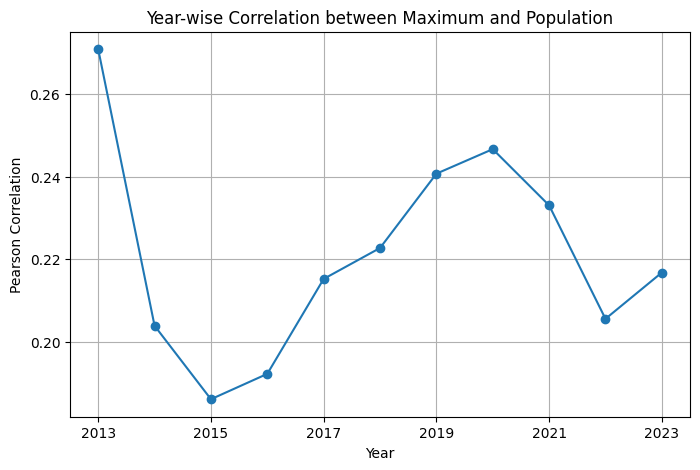

In [89]:
import matplotlib.pyplot as plt
yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Maximum"].corr(df["Population"]))
yearly_corr.plot(marker='o', title="Year-wise Correlation between Maximum and Population", figsize=(8,5))
plt.ylabel("Pearson Correlation")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<ipython-input-90-cef53e241898>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Minimum"].corr(df["Population"]))


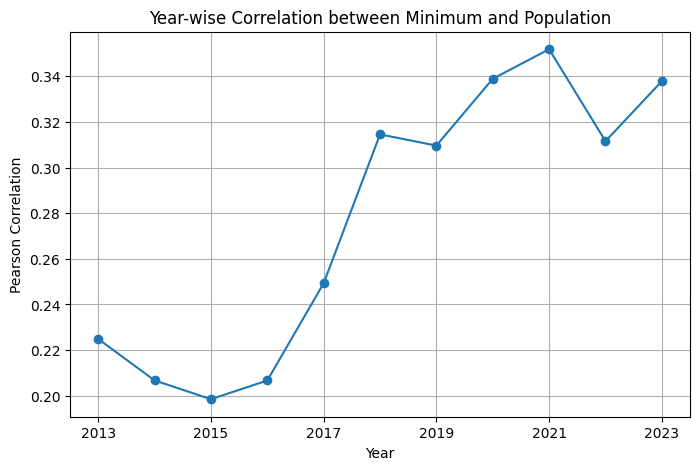

In [90]:

minimum_melted = min_df.melt(id_vars="Country", var_name="Year", value_name="Minimum")
population_metlted = population.melt(id_vars="Country", var_name="Year", value_name="Population")

# Merge the long-format data on Country and Year
combined_long_population = pd.merge(minimum_melted, population_metlted, on=["Country", "Year"])

# Pivot back to wide format with interleaved columns
combined_wide_population= combined_long_population.pivot(index="Country", columns="Year")

# Flatten multi-index columns
combined_wide_population.columns = [f"{var}_{year}" for var, year in combined_wide_population.columns]

# Reset index to bring 'Country Name' back as a column
combined_wide_population.reset_index(inplace=True)
import matplotlib.pyplot as plt
yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Minimum"].corr(df["Population"]))
yearly_corr.plot(marker='o', title="Year-wise Correlation between Minimum and Population", figsize=(8,5))
plt.ylabel("Pearson Correlation")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<ipython-input-91-d110bae54d42>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Average"].corr(df["Population"]))


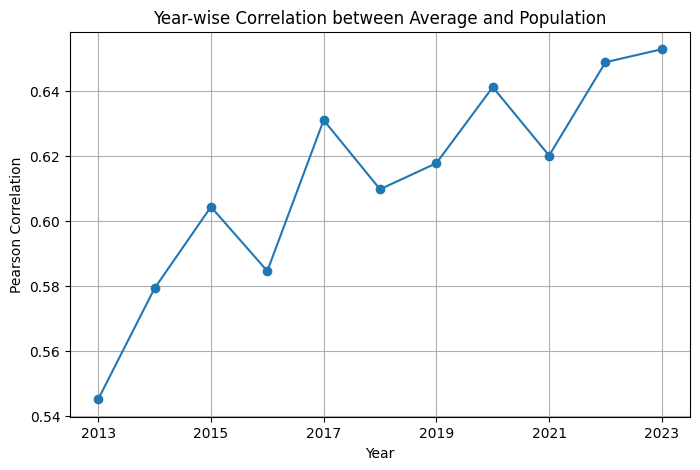

In [91]:

avg_melted = average_df.melt(id_vars="Country", var_name="Year", value_name="Average")
population_metlted = population.melt(id_vars="Country", var_name="Year", value_name="Population")

# Merge the long-format data on Country and Year
combined_long_population = pd.merge(avg_melted, population_metlted, on=["Country", "Year"])

# Pivot back to wide format with interleaved columns
combined_wide_population= combined_long_population.pivot(index="Country", columns="Year")

# Flatten multi-index columns
combined_wide_population.columns = [f"{var}_{year}" for var, year in combined_wide_population.columns]

# Reset index to bring 'Country Name' back as a column
combined_wide_population.reset_index(inplace=True)
import matplotlib.pyplot as plt
yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["Average"].corr(df["Population"]))
yearly_corr.plot(marker='o', title="Year-wise Correlation between Average and Population", figsize=(8,5))
plt.ylabel("Pearson Correlation")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<ipython-input-92-3c46e88ac11e>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["MedianMasked"].corr(df["Population"]))


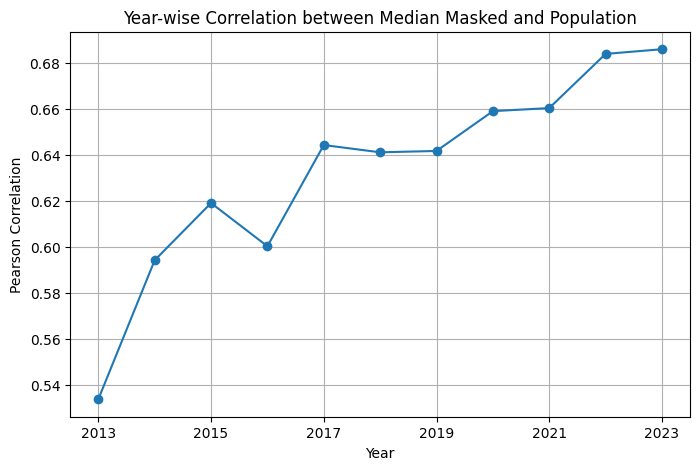

In [92]:

median_melted = median_df.melt(id_vars="Country", var_name="Year", value_name="MedianMasked")
population_metlted = population.melt(id_vars="Country", var_name="Year", value_name="Population")

# Merge the long-format data on Country and Year
combined_long_population = pd.merge(median_melted, population_metlted, on=["Country", "Year"])

# Pivot back to wide format with interleaved columns
combined_wide_population= combined_long_population.pivot(index="Country", columns="Year")

# Flatten multi-index columns
combined_wide_population.columns = [f"{var}_{year}" for var, year in combined_wide_population.columns]

# Reset index to bring 'Country Name' back as a column
combined_wide_population.reset_index(inplace=True)
import matplotlib.pyplot as plt
yearly_corr = combined_long_population.groupby("Year").apply(lambda df: df["MedianMasked"].corr(df["Population"]))
yearly_corr.plot(marker='o', title="Year-wise Correlation between Median Masked and Population", figsize=(8,5))
plt.ylabel("Pearson Correlation")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Thus all band values have a positive correlation with population which is a reasonable interpretation since it is expected and validated by research that:


*   Densely populated areas tend to have more and brighter lights at night.
*   Rural or low-population regions have lower NTL values









##Data Preprocessing

---



In [93]:
#dropping 2024 column since it is not part of our time series (2013-2023)
median_df = median_df.drop(['2024'], axis = 1)
max_df = max_df.drop(['2024'], axis = 1)
min_df = min_df.drop(['2024'], axis =1)
average_df = average_df.drop(['2024'], axis = 1)

In [94]:
#renaming columns
median_df.columns = ['Country'] + [f'median_{year}' for year in range(2013, 2024)]
max_df.columns = ['Country'] + [f'max_{year}' for year in range(2013,2024)]
min_df.columns = ['Country'] + [f'min_{year}' for year in range(2013,2024)]
average_df.columns = ['Country'] + [f'average_{year}' for year in range(2013,2024)]

In [95]:
#dropping all previous population years and using only population of 2023 as target variable
population = population.drop(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2022'], axis =1)

In [96]:
# merging band values (median_masked, minimum, maximum and average) of the Night Time Light Data to create one dataset
combined_df = pd.merge(median_df, max_df, on='Country', how='inner')
combined_df = pd.merge(combined_df, min_df, on='Country', how='inner')
combined_df = pd.merge(combined_df, average_df, on='Country', how='inner')
combined_df = pd.merge(combined_df, population, on='Country', how='inner')
combined_df.head()

,Country,median_2013,median_2014,median_2015,median_2016,median_2017,median_2018,median_2019,median_2020,median_2021,...,average_2015,average_2016,average_2017,average_2018,average_2019,average_2020,average_2021,average_2022,average_2023,2023
0,Uganda,18567.234269,18757.903367,20024.038434,19082.041700,26129.910484,26940.158057,31644.310435,34425.150394,41372.993142,...,22513.650141,22211.660909,30445.537358,29975.470204,35272.394095,39377.693698,44589.546254,53034.886433,71336.097510,48656601.0
1,Eritrea,2387.048038,2166.414558,2058.772888,2008.606258,2832.027779,2949.558310,2540.962049,2604.918399,2232.589415,...,2219.636888,2108.204855,2972.413710,3069.138318,2655.805205,2726.167263,2292.720323,2235.122080,2445.777314,3470390.0
2,Ethiopia,43817.541456,47949.138117,52999.794212,50930.361191,66205.212636,60662.970175,58846.744368,66003.987742,69814.422502,...,56298.525798,56262.305191,71447.599983,64427.197211,62853.235593,71406.645998,74338.418609,78194.899204,93645.491399,128691692.0
3,Comoros,302.185035,230.496317,169.520843,175.700849,436.962549,524.849745,428.308761,453.856041,513.244298,...,176.487744,190.476093,470.692322,549.058834,453.498598,470.675019,529.956466,622.648728,633.128053,850387.0
4,Djibouti,2988.842974,3169.500234,3558.319800,4097.033018,5032.377911,5421.726712,5612.377902,5610.321348,6137.854732,...,3796.594874,4288.881910,5154.645642,5670.611415,5788.650445,5915.925574,6340.025161,6397.001442,7116.583606,1152944.0


In [97]:
combined_df.rename(columns ={'2023': 'TargetPopulation'}, inplace=True)

In [98]:
combined_df.describe()

,median_2013,median_2014,median_2015,median_2016,median_2017,median_2018,median_2019,median_2020,median_2021,median_2022,...,average_2015,average_2016,average_2017,average_2018,average_2019,average_2020,average_2021,average_2022,average_2023,TargetPopulation
count,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,...,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02
mean,8.100456e+05,7.697236e+05,7.679600e+05,7.936262e+05,8.616845e+05,8.962799e+05,9.272980e+05,9.224673e+05,9.875067e+05,9.810997e+05,...,8.221822e+05,8.465653e+05,9.140068e+05,9.618004e+05,9.879531e+05,9.823244e+05,1.070735e+06,1.055476e+06,1.119237e+06,4.244016e+07
std,2.329424e+06,2.052952e+06,2.001070e+06,2.116719e+06,2.309284e+06,2.460684e+06,2.623825e+06,2.655370e+06,2.892153e+06,2.915291e+06,...,2.193912e+06,2.322428e+06,2.493582e+06,2.734746e+06,2.874538e+06,2.885504e+06,3.247335e+06,3.227360e+06,3.480082e+06,1.610331e+08
min,3.682358e-02,3.700197e-02,1.129756e-01,8.453017e-02,2.232130e-01,4.626817e-01,1.465305e+00,3.560827e+00,3.463753e+00,1.905162e+00,...,9.480224e-02,1.009298e-01,2.357896e-01,4.572256e-01,1.524380e+00,3.516568e+00,3.547401e+00,1.965683e+00,2.634693e+00,9.816000e+03
25%,1.182414e+04,1.297940e+04,1.443316e+04,1.505320e+04,1.715994e+04,1.936936e+04,1.958578e+04,2.210777e+04,2.396388e+04,2.436199e+04,...,1.501304e+04,1.554846e+04,1.782251e+04,2.046936e+04,2.057649e+04,2.369268e+04,2.472915e+04,2.515691e+04,3.131580e+04,2.232406e+06
50%,9.849530e+04,1.040051e+05,1.054400e+05,1.037611e+05,1.223809e+05,1.181203e+05,1.219277e+05,1.181130e+05,1.166413e+05,1.124104e+05,...,1.081118e+05,1.071977e+05,1.271911e+05,1.198179e+05,1.271540e+05,1.228586e+05,1.215496e+05,1.206835e+05,1.377999e+05,9.756600e+06
75%,5.846979e+05,6.219537e+05,5.877913e+05,6.118704e+05,6.824514e+05,6.896891e+05,6.696364e+05,6.765784e+05,7.036478e+05,6.425686e+05,...,6.311947e+05,6.535448e+05,6.877422e+05,7.216974e+05,7.084489e+05,7.186424e+05,7.426219e+05,6.796689e+05,7.330242e+05,2.903365e+07
max,2.232405e+07,1.749097e+07,1.605976e+07,1.783695e+07,1.849675e+07,2.042516e+07,2.226608e+07,2.198505e+07,2.420438e+07,2.348944e+07,...,1.844796e+07,2.047700e+07,2.081614e+07,2.445866e+07,2.563036e+07,2.503388e+07,2.949263e+07,2.811385e+07,3.063710e+07,1.438070e+09


##Regression Modelling

In [99]:
pip install catboost

In [100]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import NotFittedError

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [107]:
X = combined_df.drop(columns=["TargetPopulation", "Country"])
y = combined_df["TargetPopulation"]


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [108]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}


SHAP summary for Linear Regression


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


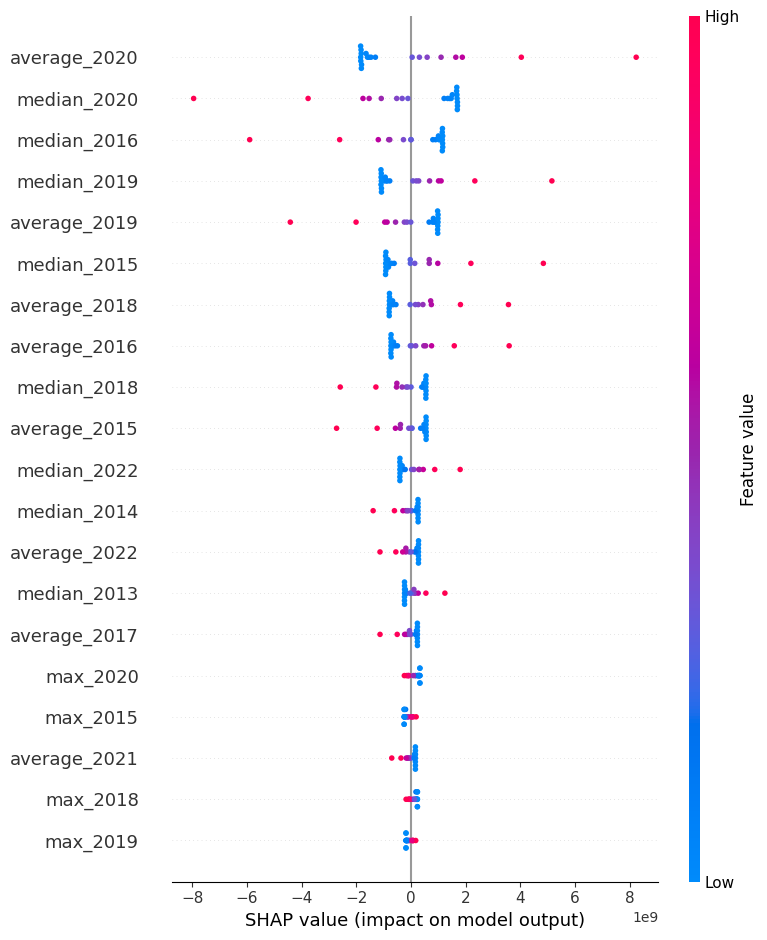

  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for Ridge Regression


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


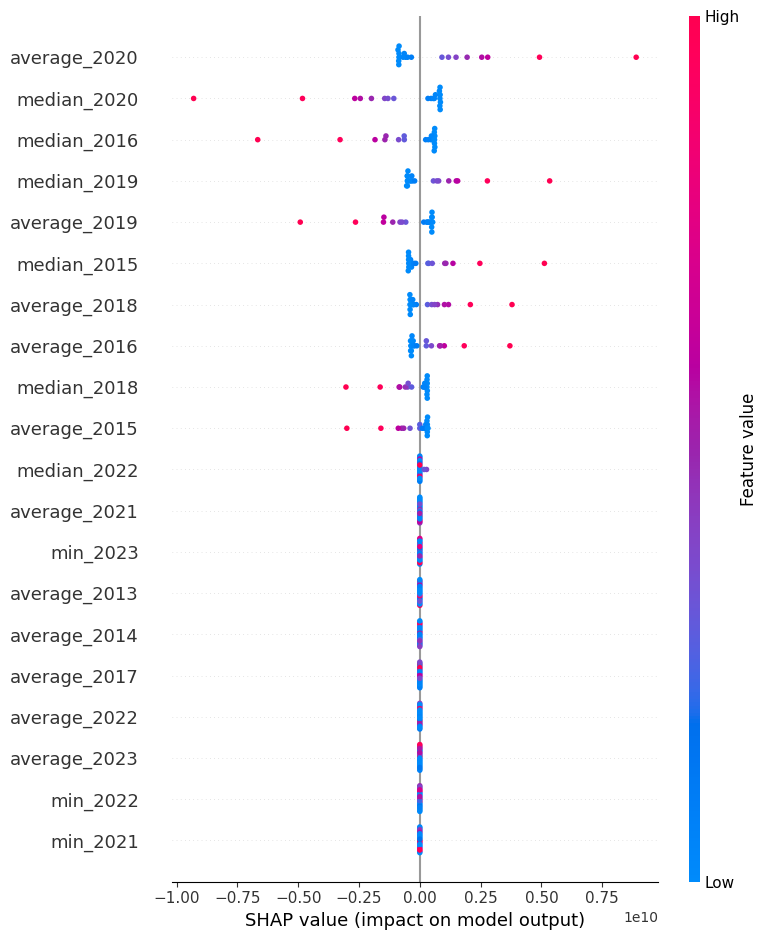

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.909e+16, tolerance: 4.053e+14
  model = cd_fast.enet_coordinate_descent(


  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for Lasso Regression


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


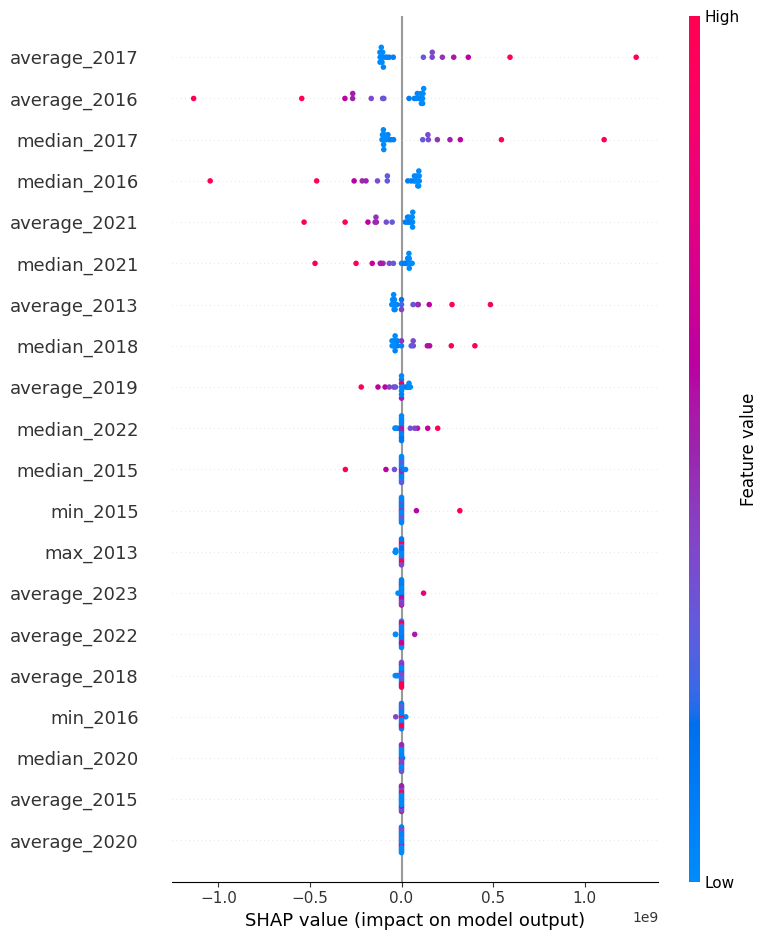

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.909e+16, tolerance: 4.053e+14
  model = cd_fast.enet_coordinate_descent(


  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for ElasticNet


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


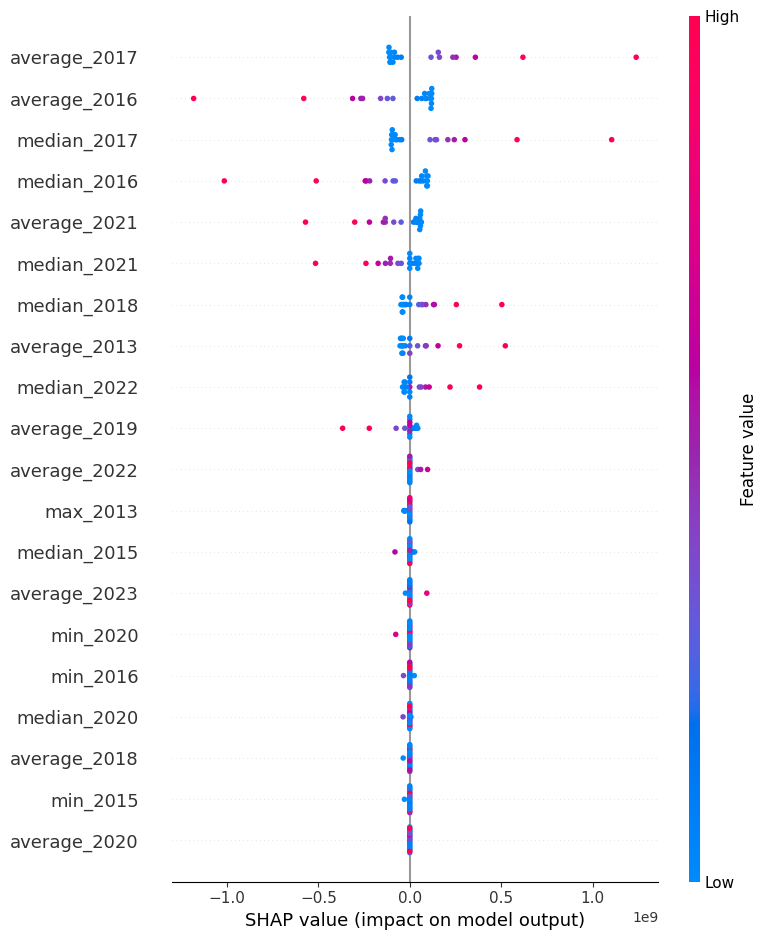


SHAP summary for Decision Tree


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


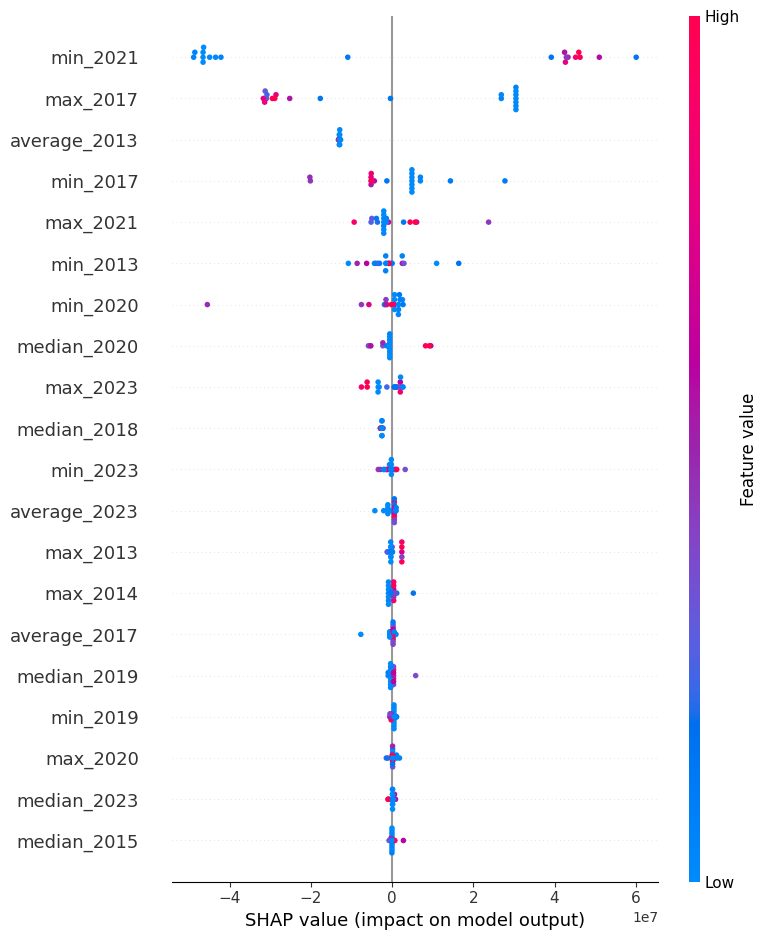


SHAP summary for Random Forest


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


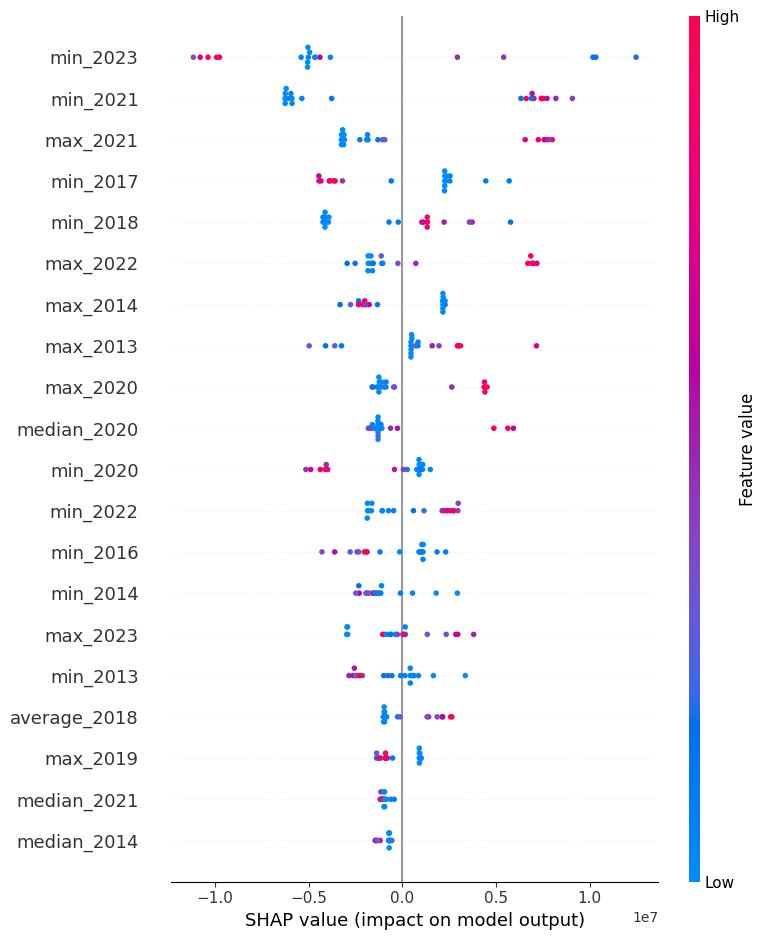


SHAP summary for XGBoost


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


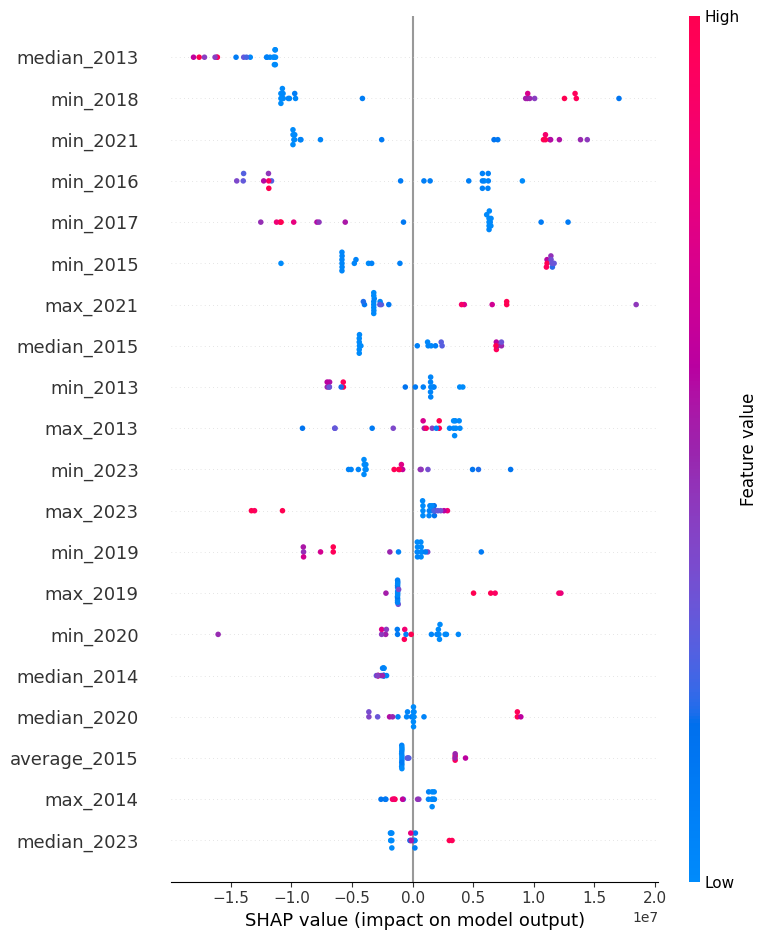

  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for Support Vector Regressor


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


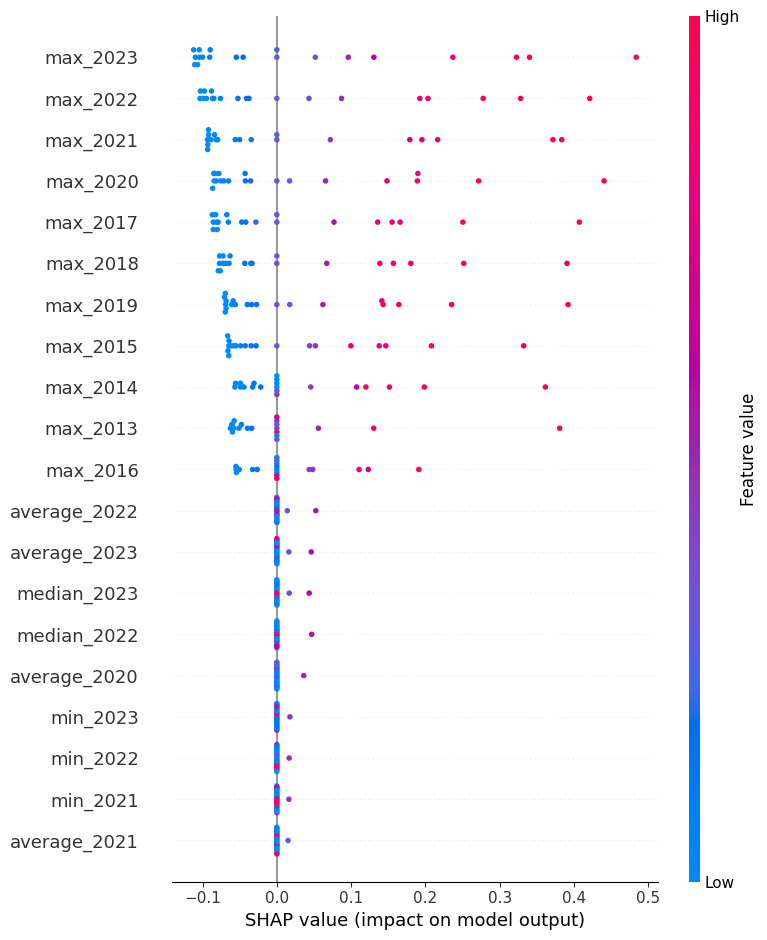

  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for KNN Regressor


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


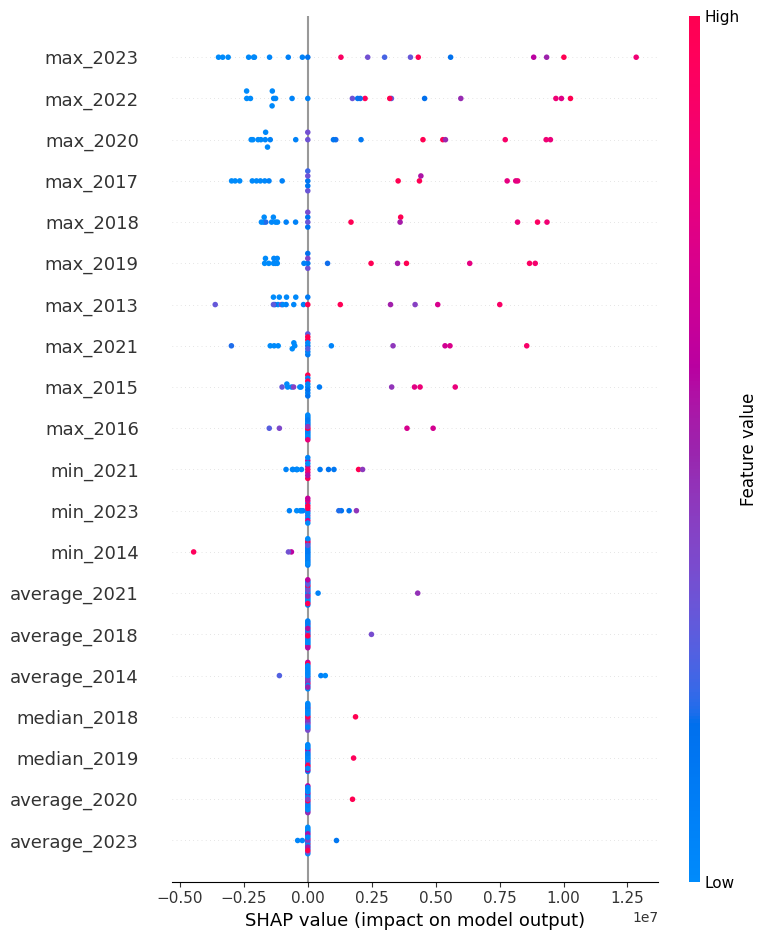

  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for Bayesian Ridge


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


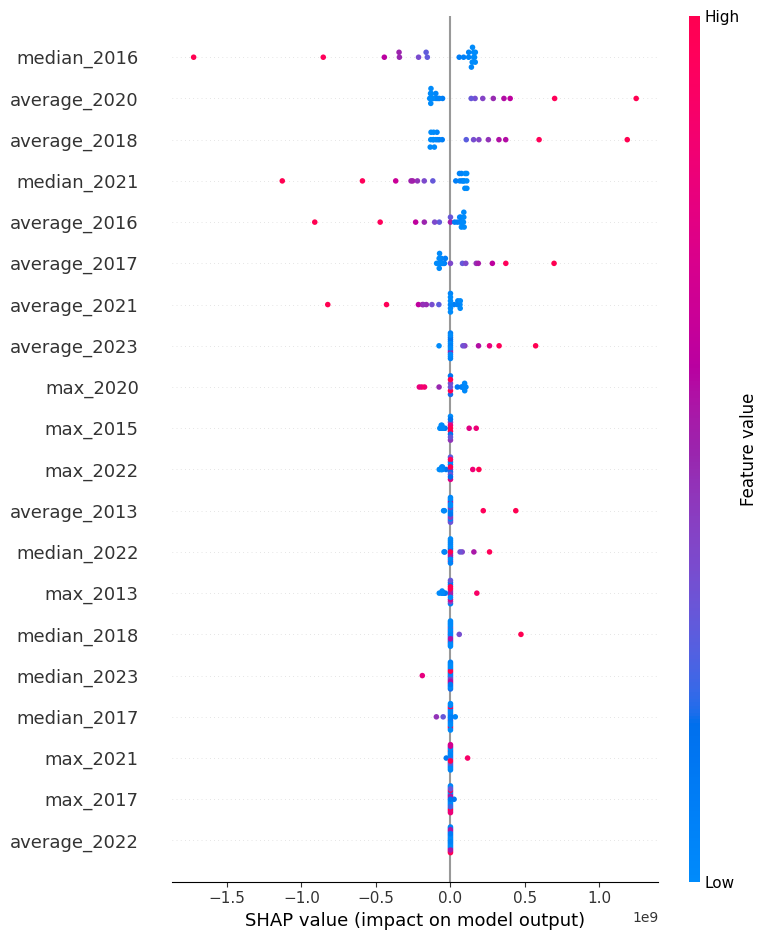

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]


SHAP summary for MLP Regressor


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


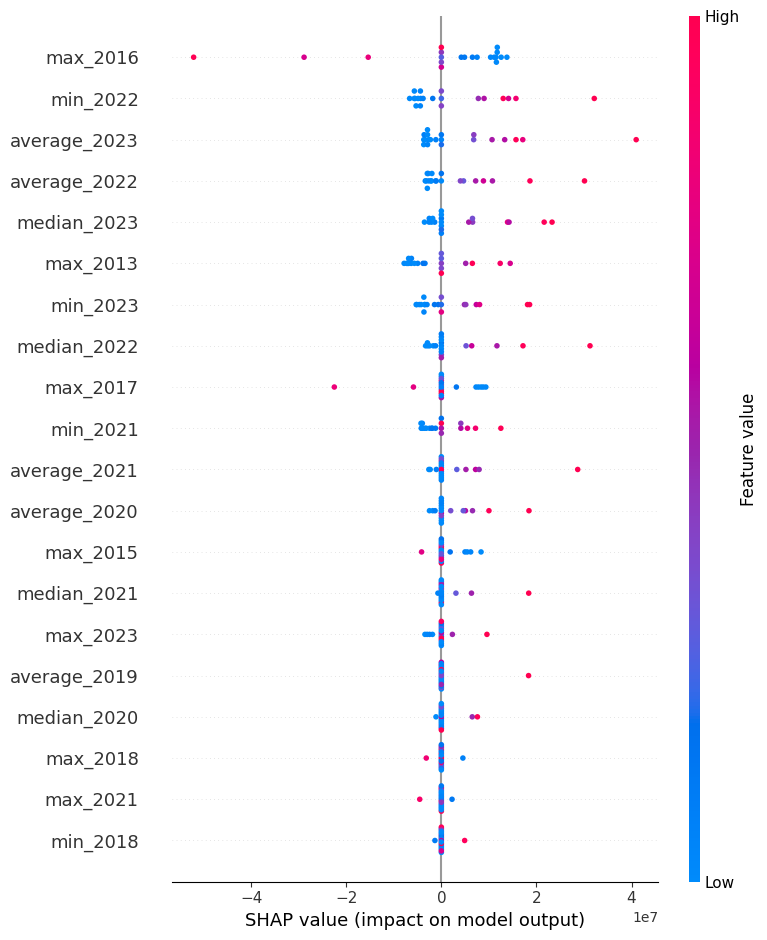


SHAP summary for CatBoost


<ipython-input-109-cf9b909da329>:29: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)


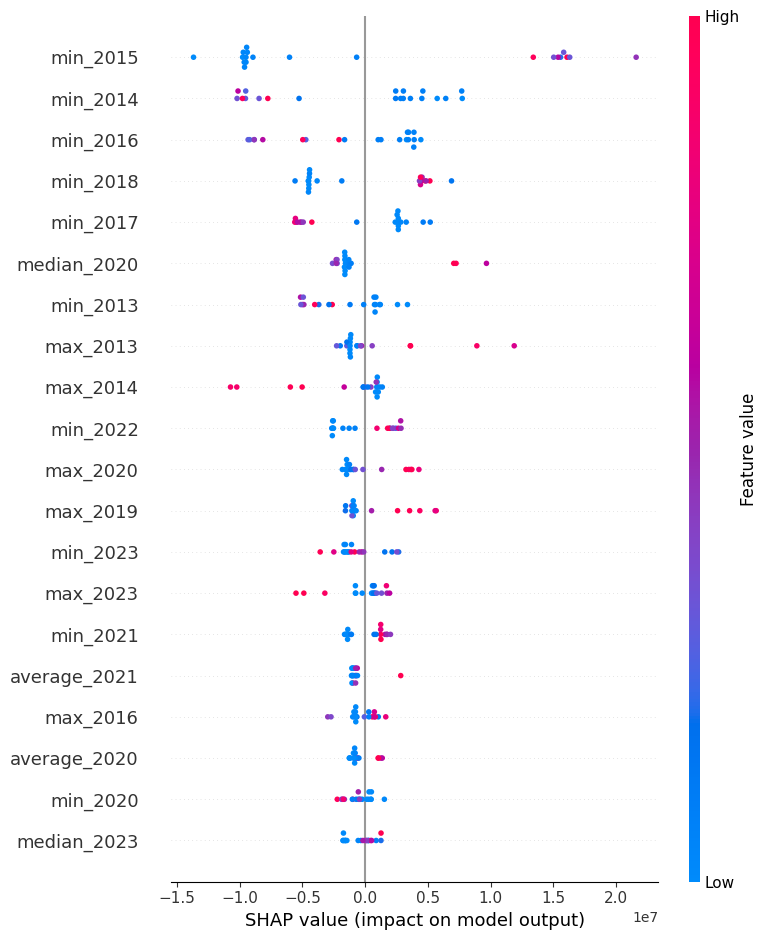

In [109]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })

    # SHAP Explanation
    try:
        if name in ["Random Forest", "Decision Tree", "XGBoost", "CatBoost"]:
            explainer = shap.Explainer(model, X_train)
        elif name == "Linear Regression":
            explainer = shap.Explainer(model.predict, X_train)
        else:
            explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 20))  # use smaller background set for speed

        shap_values = explainer(X_test[:20])
        print(f"\nSHAP summary for {name}")
        shap.summary_plot(shap_values, X_test[:20], feature_names=X.columns, show=True)
    except Exception as e:
        print(f"Could not generate SHAP for {name}: {e}")

<ipython-input-110-6ad856182963>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values(by="R2 Score", ascending=False), x="R2 Score", y="Model", palette="viridis")


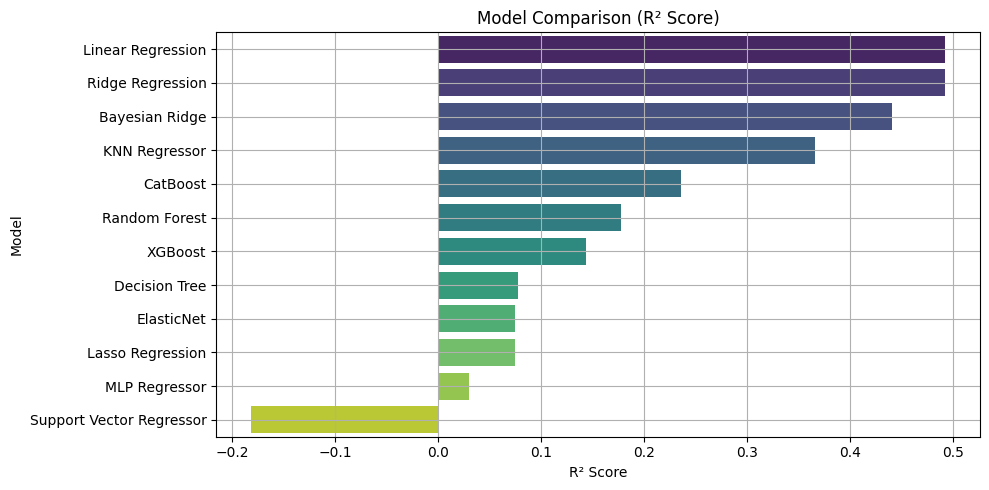

In [110]:
results_df = pd.DataFrame(results)

# Plot R² Scores
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.sort_values(by="R2 Score", ascending=False), x="R2 Score", y="Model", palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
results_df = results_df.sort_values(by="R2 Score", ascending=False)

# Print the summary table
print("Model Performance Summary:\n")
print(results_df.to_string(index=False))

# Optional: save to CSV
results_df.to_csv("model_summary.csv", index=False)

Model Performance Summary:

                   Model  R2 Score          MAE         RMSE
       Linear Regression  0.492083 2.831760e+07 4.763000e+07
        Ridge Regression  0.492083 2.831760e+07 4.763000e+07
          Bayesian Ridge  0.440415 3.025901e+07 4.999391e+07
           KNN Regressor  0.365494 2.698514e+07 5.323559e+07
                CatBoost  0.235457 2.575440e+07 5.843664e+07
           Random Forest  0.177444 2.627160e+07 6.061317e+07
                 XGBoost  0.144002 2.564478e+07 6.183304e+07
           Decision Tree  0.077643 3.090515e+07 6.418502e+07
              ElasticNet  0.074460 3.634556e+07 6.429568e+07
        Lasso Regression  0.074460 3.634556e+07 6.429568e+07
           MLP Regressor  0.029531 3.446000e+07 6.583776e+07
Support Vector Regressor -0.181607 3.549183e+07 7.264751e+07


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.2824 - val_loss: 0.1093
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1913 - val_loss: 0.1129
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1360 - val_loss: 0.1063
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1056 - val_loss: 0.1153
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1619 - val_loss: 0.0968
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1084 - val_loss: 0.1186
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1341 - val_loss: 0.0939
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1474 - val_loss: 0.0931
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1280 - val_loss: 0.0950
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1283 - val_loss: 0.0930
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1275 - val_loss: 0.0876
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1198 - val_l